# Team 09 Assignment 02: Figure generating notebook

## Setup

In [ ]:
import os
import json
import pandas
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import datetime

In [ ]:
with open("data/db_raka.json", "r") as fh:
    db_raka = json.load(fh)
    
with open("data/db_stanley.json", "r") as fh:
    db_stanley = json.load(fh)
    
with open("data/db_yannik.json", "r") as fh:
    db_yannik = json.load(fh)

In [ ]:
## Accumulative hours

hours = (len(db_raka) + len(db_stanley) + len(db_yannik)) / 4.0
print("Accumulative hours:", hours)

In [4]:
## Devices

devices_raka = set()
for d in db_raka:
    devices_raka = devices_raka.union(set(d["devices"].keys()))

print("Raka's devices:", str(devices_raka))

devices_stanley = set()
for d in db_stanley:
    devices_stanley = devices_stanley.union(set(d["devices"].keys()))

print("Stanley's devices:", str(devices_stanley))

devices_yannik = set()
for d in db_yannik:
    devices_yannik = devices_yannik.union(set(d["devices"].keys()))

print("Yannik's devices:", str(devices_yannik))

Raka's devices: {'handy', 'unknown', 'stand-pc', 'laptop'}
Stanley's devices: {'handy', 'unknown', 'tv', 'laptop'}
Yannik's devices: {'homepod', 'handy2', 'handy', 'unknown', 'tablet', 'laptop'}


## Service Related

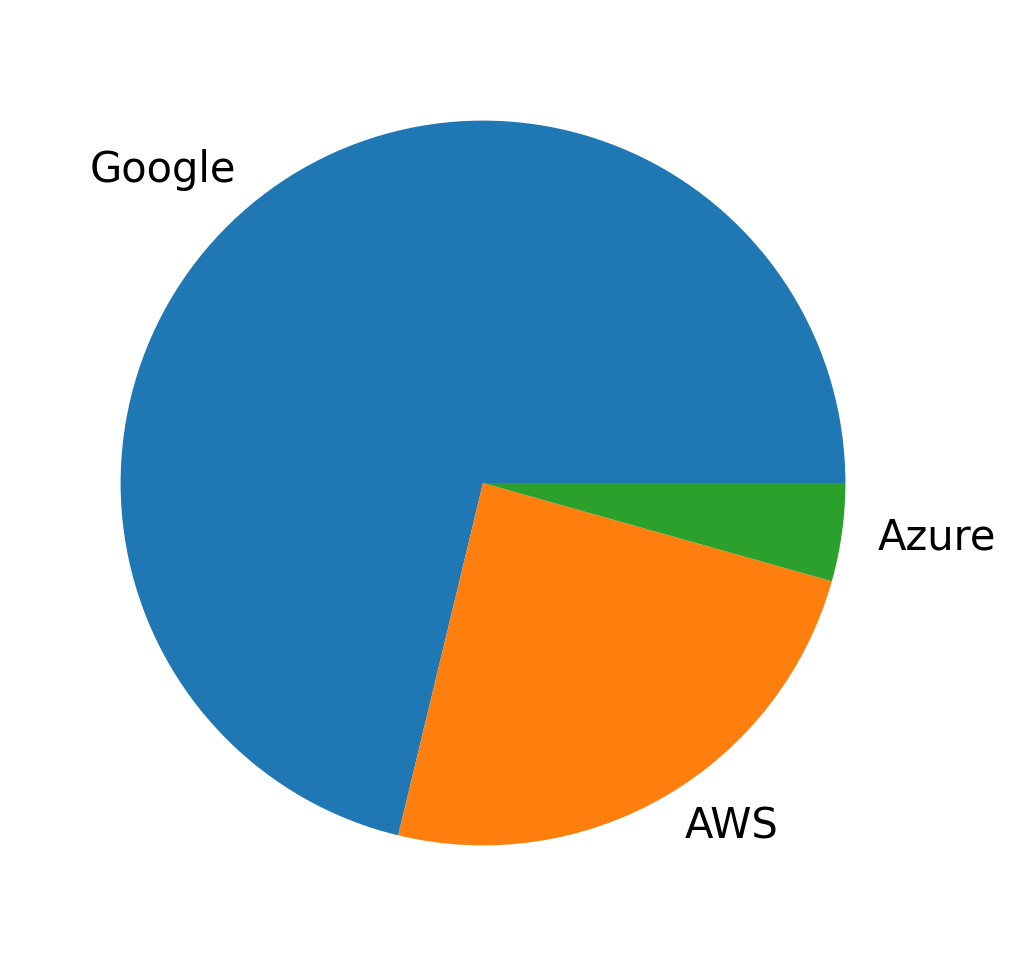

In [5]:
## Total Services

service_cnt = {
    "Google": 0,
    "AWS": 0,
    "Azure": 0
}

db_all = (db_raka + db_yannik + db_stanley)
for data in db_all:
    for dev in data["devices"]:
        for service in data["devices"][dev]["services_ipv4"]:
            service_cnt[service] += data["devices"][dev]["services_ipv4"][service]
        for service in data["devices"][dev]["services_ipv6"]:
            service_cnt[service] += data["devices"][dev]["services_ipv6"][service]

plt.figure(dpi=300)
plt.pie(service_cnt.values(), labels = service_cnt.keys())
#plt.legend()
plt.savefig("output_totalservices.png", transparent=True)
plt.show()

In [7]:
servicesum = 0
totalsum = 0
for data in db_all:
    for dev in data["devices"]:
        totalsum += data["devices"][dev]["total_size"]
        for service in data["devices"][dev]["services_ipv4"]:
            servicesum += data["devices"][dev]["services_ipv4"][service]
        for service in data["devices"][dev]["services_ipv6"]:
            servicesum += data["devices"][dev]["services_ipv6"][service]
print("Total size:", totalsum/1e9, "GB Service Size:", servicesum/1e9, "GB")

Total size: 88.060347313 GB Service Size: 9.73572527 GB


## DNS Related

In [9]:
def dict_cnt(dic, key):
    if(key in dic):
        dic[key] += 1
    else:
        dic[key] = 1

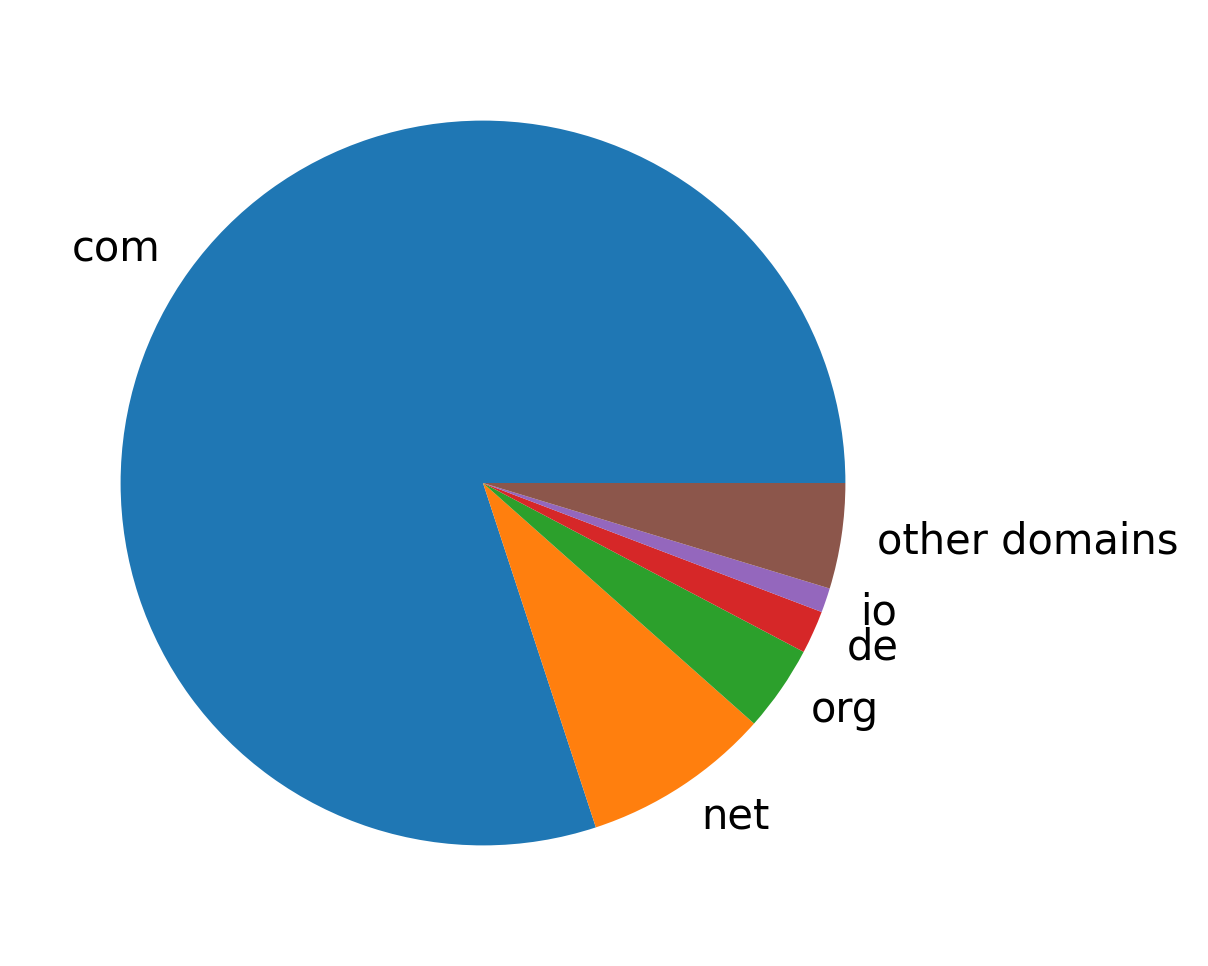

In [10]:
## Total DNS

tld_cnt = {}
all_devices = list(devices_raka) + list(devices_yannik) + list(devices_stanley)
for dev in all_devices:
    tld_cnt[dev] = {}

db_all = (db_raka + db_yannik + db_stanley)
for data in db_all:
    for dev in data["devices"]:
        for name in data["devices"][dev]["dns"]:
            d_list = name.strip().split(".")
            if(len(d_list) != 3):
                continue
            tld = d_list[-1]
            tld = tld.lower()
            dict_cnt(tld_cnt[dev], tld)

tld_dict_all = {}

for dev in tld_cnt:
    for dns in tld_cnt[dev]:
        if dns in tld_dict_all:
            tld_dict_all[dns] += tld_cnt[dev][dns]
        else:
            tld_dict_all[dns] = tld_cnt[dev][dns]
            
tld_dict_list = list(tld_dict_all.items())
def keyFunc(e):
    return e[1]
tld_dict_list.sort(key=keyFunc, reverse=True)
tld_dict_new = {}
if len(tld_dict_list) > 5:
    for i in range(5):
        tld_dict_new[tld_dict_list[i][0]] = tld_dict_list[i][1]
    cnt_sum = 0
    for e in tld_dict_list[6:]:
        cnt_sum += e[1]
    tld_dict_new["other domains"] = cnt_sum
else:
    tld_dict_new = tld_dict_all

tld_dict_new

plt.figure(dpi=300)
plt.pie(tld_dict_new.values(), labels = tld_dict_new.keys())
#plt.legend()
plt.savefig("output_totaldns.png", transparent=True)
plt.show()

In [13]:
# Total distint keys
len(tld_dict_all.keys())

62

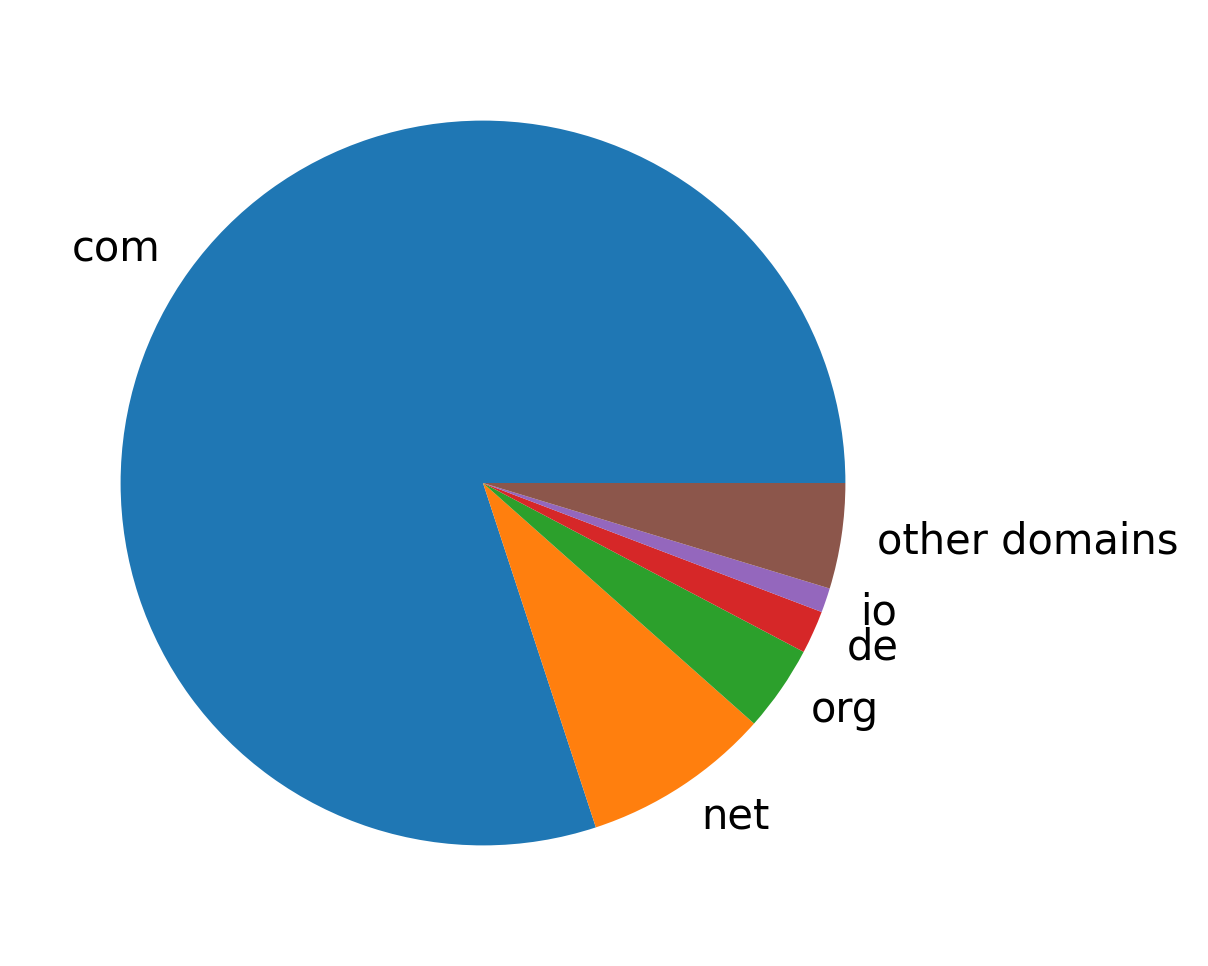

In [14]:
## Total

tld_cnt = {}
all_devices = list(devices_raka) + list(devices_yannik) + list(devices_stanley)
for dev in all_devices:
    tld_cnt[dev] = {}

db_all = (db_raka + db_yannik + db_stanley)
for data in db_all:
    for dev in data["devices"]:
        for name in data["devices"][dev]["dns"]:
            d_list = name.strip().split(".")
            if(len(d_list) != 3):
                continue
            tld = d_list[-1]
            tld = tld.lower()
            dict_cnt(tld_cnt[dev], tld)

for dev in tld_cnt:
    for dns in tld_cnt[dev]:
        if dns in tld_dict_all:
            tld_dict_all[dns] += tld_cnt[dev][dns]
        else:
            tld_dict_all[dns] = tld_cnt[dev][dns]
            
tld_dict_list = list(tld_dict_all.items())
def keyFunc(e):
    return e[1]
tld_dict_list.sort(key=keyFunc, reverse=True)
tld_dict_new = {}
if len(tld_dict_list) > 5:
    for i in range(5):
        tld_dict_new[tld_dict_list[i][0]] = tld_dict_list[i][1]
    cnt_sum = 0
    for e in tld_dict_list[6:]:
        cnt_sum += e[1]
    tld_dict_new["other domains"] = cnt_sum
else:
    tld_dict_new = tld_dict_all

tld_dict_new

plt.figure(dpi=300)
plt.pie(tld_dict_new.values(), labels = tld_dict_new.keys())
#plt.legend()
plt.savefig("output_totaldns.png", transparent=True)
plt.show()

akira
yesstyle
nd-cca
yesstyle
kolumbo
nesskain
brave
sigaction
sigwait
sigprocmaask
januar
rapier
snakeeyes
Device: handy


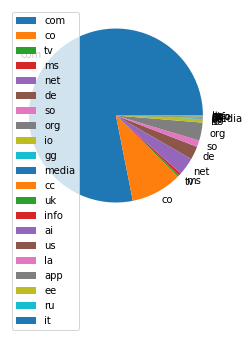

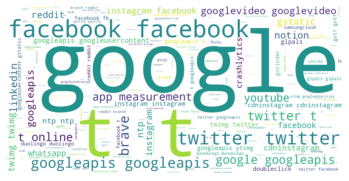

Device: stand-pc


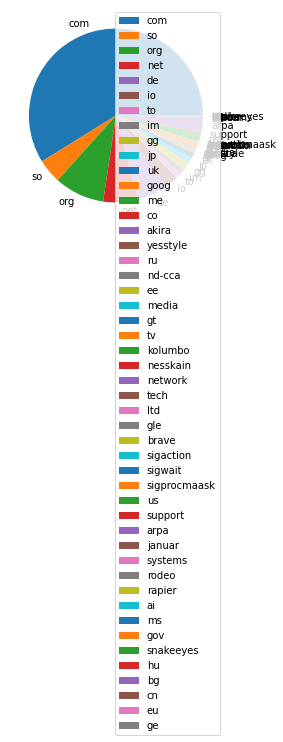

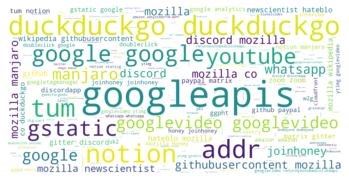

Device: laptop


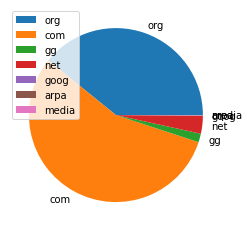

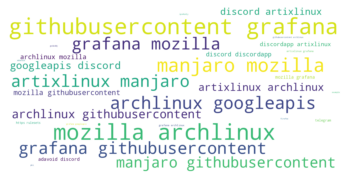

In [17]:
## Raka

devdns = {}
tld_cnt = {}
for dev in devices_raka:
    devdns[dev] = ""
    tld_cnt[dev] = {}
for data in db_raka:
    for dev in data["devices"]:
        domains = data["devices"][dev]["dns"]
        dns_str = ""
        for d in domains:
            if(len(d.split(".")) < 2):
                print(d)
                continue
            dns_str += d.split(".")[-2].strip() + " "
        devdns[dev] += dns_str
        for name in data["devices"][dev]["dns"]:
            tld = name.strip().split(".")[-1]
            dict_cnt(tld_cnt[dev], tld)

devdns_raka = devdns


for dev in devices_raka:
    if(tld_cnt[dev] == {}):
        continue
    print("Device:", dev)
    plt.pie(tld_cnt[dev].values(), labels = tld_cnt[dev].keys())
    plt.legend()
    plt.show()
    
    if(devdns[dev] != ""):
        wordcloud = WordCloud(background_color="white",
                              width=1600, height=800).generate(devdns[dev])
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()
    else:
        print(f"Device {dev} made no DNS requests")

Device: handy


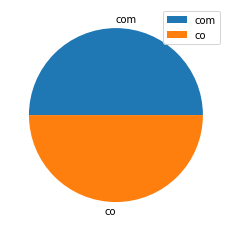

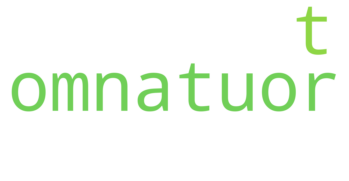

Device: laptop


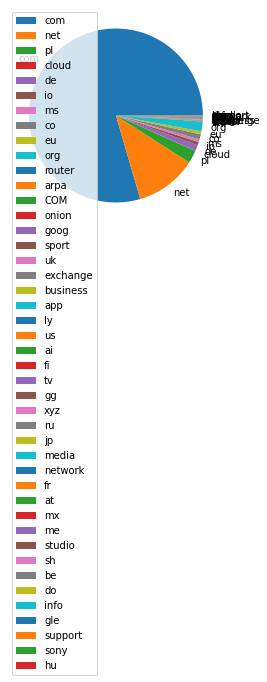

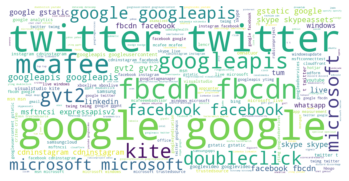

In [18]:
## Stanley

devdns = {}
tld_cnt = {}
for dev in devices_stanley:
    devdns[dev] = ""
    tld_cnt[dev] = {}
for data in db_stanley:
    for dev in data["devices"]:
        domains = data["devices"][dev]["dns"]
        dns_str = ""
        for d in domains:
            if(len(d.split(".")) < 2):
                print(d)
                continue
            dns_str += d.split(".")[-2].strip() + " "
        devdns[dev] += dns_str
        for name in data["devices"][dev]["dns"]:
            tld = name.strip().split(".")[-1]
            dict_cnt(tld_cnt[dev], tld)

devdns_stanley = devdns


for dev in devices_stanley:
    if(tld_cnt[dev] == {}):
        continue
    print("Device:", dev)
    plt.pie(tld_cnt[dev].values(), labels = tld_cnt[dev].keys())
    plt.legend()
    plt.show()
    
    if(devdns[dev] != ""):
        wordcloud = WordCloud(background_color="white",
                              width=1600, height=800).generate(devdns[dev])
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()
    else:
        print(f"Device {dev} made no DNS requests")

Device: homepod


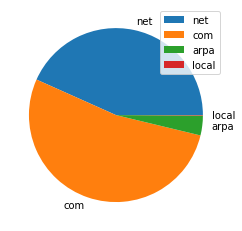

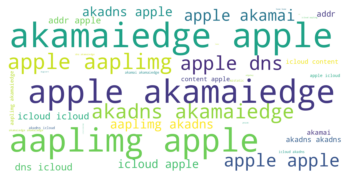

Device: handy2


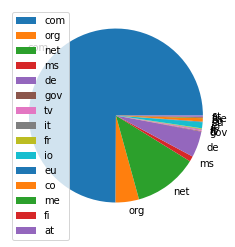

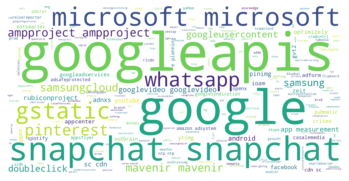

Device: handy


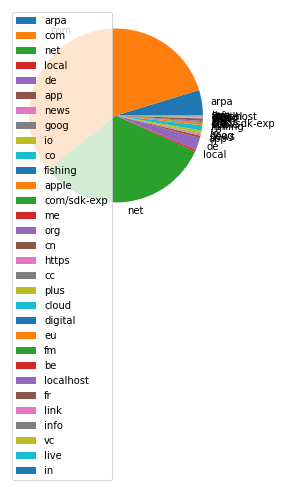

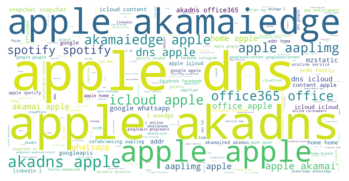

Device: unknown


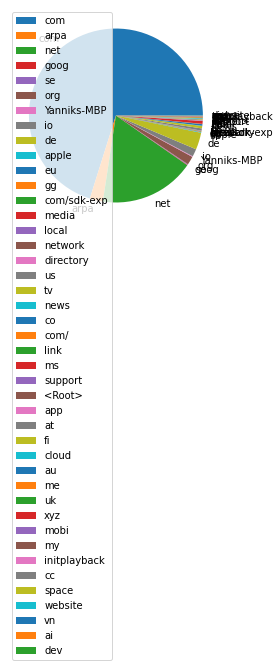

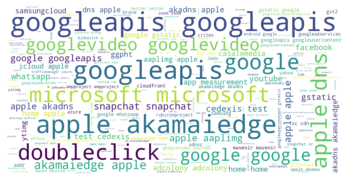

Device: tablet


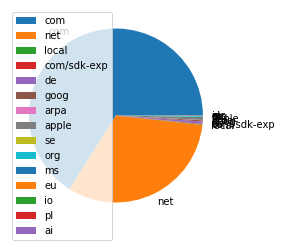

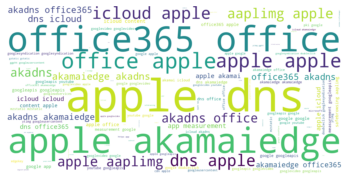

Device: laptop


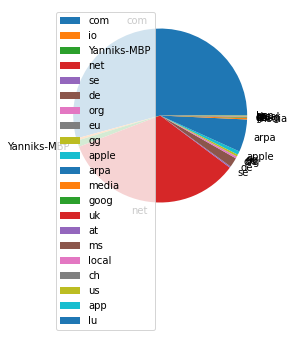

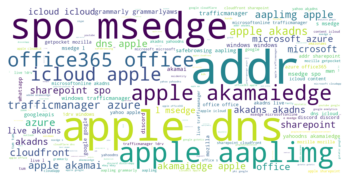

In [19]:
## Yannik

devdns = {}
tld_cnt = {}
for dev in devices_yannik:
    devdns[dev] = ""
    tld_cnt[dev] = {}
for data in db_yannik:
    for dev in data["devices"]:
        domains = data["devices"][dev]["dns"]
        dns_str = ""
        for d in domains:
            if(len(d.split(".")) < 2):
                continue
            dns_str += d.split(".")[-2].strip() + " "
        devdns[dev] += dns_str
        for name in data["devices"][dev]["dns"]:
            tld = name.strip().split(".")[-1]
            dict_cnt(tld_cnt[dev], tld)
            
devdns_yannik = devdns


for dev in devices_yannik:
    if(tld_cnt[dev] == {}):
        continue
    print("Device:", dev)
    plt.pie(tld_cnt[dev].values(), labels = tld_cnt[dev].keys())
    plt.legend()
    plt.show()
    
    wordcloud = WordCloud(background_color="white",
                          width=1600, height=800).generate(devdns[dev])
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [20]:
print(devdns_raka.keys())
print(devdns_stanley.keys())
print(devdns_yannik.keys())

devdns_all = {
    "apple": devdns_yannik["handy"] + devdns_yannik["laptop"] + devdns_yannik["homepod"],
    "android": devdns_raka["handy"] + devdns_stanley["handy"] + devdns_yannik["handy2"]
}

dict_keys(['handy', 'unknown', 'stand-pc', 'laptop'])
dict_keys(['handy', 'unknown', 'tv', 'laptop'])
dict_keys(['homepod', 'handy2', 'handy', 'unknown', 'tablet', 'laptop'])


Device: apple


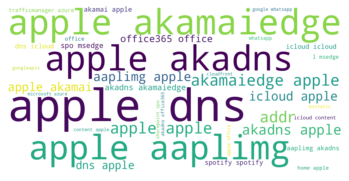

Saving wordcloud in domaincloud_apple.png
Device: android


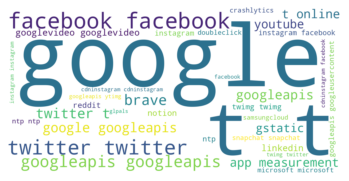

Saving wordcloud in domaincloud_android.png


In [21]:
# Used figures in latex

for dev in devdns_all:
    print("Device:", dev)
    wordcloud = WordCloud(background_color="white",
                          width=1600, height=800,
                          min_font_size=10,
                          max_words=35).generate(devdns_all[dev])
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    filename = f"domaincloud_{dev}.png"
    print("Saving wordcloud in", filename)
    wordcloud.to_file(filename)

## Activity Display

In [22]:
import datetime

## Enter Parameters here

# Start and End date of graph
startdate_str =  "2022-01-13T01:45:00+01:00"
enddate_str =    "2022-01-13T10:45:00+01:00"

# Start and End time of shaded area
startshade_str = "2022-01-13T02:00:00+01:00"
endshade_str =   "2022-01-13T08:30:00+01:00"
shadecolor = "y"

# Used db
db_used = db_raka

######################################################################
######################################################################
######################################################################

def gen_activitygraph(startdate_str, enddate_str, db_used, startshade_str="", endshade_str="", shadecolor="w",
                      tickn = 4, showtotal = False, savefile="", skipdevices=[]):
    if startshade_str == "":
        startshade_str = startdate_str
    if endshade_str == "":
        endshade_str = enddate_str
    
    ## Filtering Within a timerange
    startdate = datetime.datetime.fromisoformat(startdate_str)
    enddate = datetime.datetime.fromisoformat(enddate_str)

    startshade = datetime.datetime.fromisoformat(startshade_str)
    endshade = datetime.datetime.fromisoformat(endshade_str)

    def filter_func(stamp):
        date = datetime.datetime.fromisoformat(stamp["timestamp"])
        if startdate < date and date < enddate:
            return True
        else:
            return False

    db_filtered = [s for s in db_used if filter_func(s)]

    # Sorting dates
    def keyFunc(d):
        return datetime.datetime.fromisoformat(d["timestamp"])

    db_filtered.sort(key=keyFunc)

    ## Define plot data
    # Time Series
    dates = [datetime.datetime.fromisoformat(d["timestamp"]) for d in db_filtered]

    # Total data size
    sizes = []
    for stamp in db_filtered:
        size = 0
        for dev in stamp["devices"]:
            size += stamp["devices"][dev]["total_size"]
        sizes.append(size)
    
    sizes_per_dev = {}
    for s in db_filtered:
        for dev in s["devices"]:
            sizes_per_dev[dev] = []
            
    for s in db_filtered:
        for dev in sizes_per_dev:
            if(dev in s["devices"]):
                sizes_per_dev[dev].append(s["devices"][dev]["total_size"])
            else:
                sizes_per_dev[dev].append(0)
    if("unknown" in sizes_per_dev):
        del sizes_per_dev["unknown"]

    # TODO: Other Protocols
    #asdf
    #asdf

    ## Plot data
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10) 

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1]) # main axes

    plt.axvspan(startshade, endshade, color=shadecolor, alpha=0.2, lw=0)
    
    #print(len(sizes))
    if showtotal:
        ax.plot(dates, sizes, label="total traffic", linewidth=3)
    
    total_size = 0
    for dev in sizes_per_dev:
        total_size += sum(sizes_per_dev[dev]) / 1e9
    print("Total size", total_size, "GB")

    for dev in sizes_per_dev:
        if dev in skipdevices:
            continue
        ax.plot(dates, sizes_per_dev[dev], label=f'{dev} traffic', linewidth=3)

    #add title and axis labels
    ax.set_xlabel("Date")
    ax.set_ylabel("Traffic in bytes")
    #ax.set_yscale("log")
    ax.set_title("Total traffic size")
    ax.set_xticks(dates[::tickn])
    labels = [d.time().strftime("%H:%M") for d in dates]
    ax.set_xticklabels(labels[::tickn])

    #add legend
    ax.legend()

    #display plot
    plt.show()
    
    if(savefile != ""):
        plt.savefig(savefile, transparent=True)

#gen_activitygraph(startdate_str, enddate_str, startshade_str, endshade_str, shadecolor, db_raka)

In [23]:
def gen_ioactivitygraph(startdate_str, enddate_str, db_used, startshade_str="", endshade_str="", shadecolor="w",
                      tickn = 4, showtotal = False, savefile="", skipdevices=[]):
    if startshade_str == "":
        startshade_str = startdate_str
    if endshade_str == "":
        endshade_str = enddate_str
    
    ## Filtering Within a timerange
    startdate = datetime.datetime.fromisoformat(startdate_str)
    enddate = datetime.datetime.fromisoformat(enddate_str)

    startshade = datetime.datetime.fromisoformat(startshade_str)
    endshade = datetime.datetime.fromisoformat(endshade_str)

    def filter_func(stamp):
        date = datetime.datetime.fromisoformat(stamp["timestamp"])
        if startdate < date and date < enddate:
            return True
        else:
            return False

    db_filtered = [s for s in db_used if filter_func(s)]

    # Sorting dates
    def keyFunc(d):
        return datetime.datetime.fromisoformat(d["timestamp"])

    db_filtered.sort(key=keyFunc)

    ## Define plot data
    # Time Series
    dates = [datetime.datetime.fromisoformat(d["timestamp"]) for d in db_filtered]

    # Total data size
    sizes = {
        "in": [],
        "out": []
    }
    for stamp in db_filtered:
        in_size = 0
        out_size = 0
        for dev in stamp["devices"]:
            in_size += stamp["devices"][dev]["total_in_ipv4_size"]
            in_size += stamp["devices"][dev]["total_in_ipv6_size"]
            out_size += stamp["devices"][dev]["total_out_ipv4_size"]
            out_size += stamp["devices"][dev]["total_out_ipv6_size"]
        sizes["in"].append(in_size)
        sizes["out"].append(out_size)
    
    sizes_per_dev = {}
    for s in db_filtered:
        for dev in s["devices"]:
            sizes_per_dev[dev] = {"in":[], "out":[]}
            
    for s in db_filtered:
        for dev in sizes_per_dev:
            if(dev in s["devices"]):
                in_size = s["devices"][dev]["total_in_ipv4_size"]
                in_size += s["devices"][dev]["total_in_ipv6_size"]
                out_size = s["devices"][dev]["total_out_ipv4_size"]
                out_size += s["devices"][dev]["total_out_ipv6_size"]
                sizes_per_dev[dev]["in"].append(in_size)
                sizes_per_dev[dev]["out"].append(out_size)
            else:
                sizes_per_dev[dev]["in"].append(0)
                sizes_per_dev[dev]["out"].append(0)
    if("unknown" in sizes_per_dev):
        del sizes_per_dev["unknown"]

    # TODO: Other Protocols
    #asdf
    #asdf

    ## Plot data
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10) 

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1]) # main axes

    plt.axvspan(startshade, endshade, color=shadecolor, alpha=0.2, lw=0)
    
    #print(len(sizes))
    if showtotal:
        ax.plot(dates, sizes["in"], label="total incoming traffic", linewidth=3)
        ax.plot(dates, sizes["out"], label="total outgoing traffic", linewidth=3)

    for dev in sizes_per_dev:
        if dev in skipdevices:
            continue
        ax.plot(dates, sizes_per_dev[dev]["in"], label=f'{dev} incoming traffic', linewidth=3)
        ax.plot(dates, sizes_per_dev[dev]["out"], label=f'{dev} outgoing traffic', linewidth=3)

    #add title and axis labels
    ax.set_xlabel("Date")
    ax.set_ylabel("Traffic in bytes")
    #ax.set_yscale("log")
    ax.set_title("Total traffic size")
    ax.set_xticks(dates[::tickn])
    labels = [d.time().strftime("%H:%M") for d in dates]
    ax.set_xticklabels(labels[::tickn])

    #add legend
    ax.legend()

    #display plot
    plt.show()
    
    if(savefile != ""):
        plt.savefig(savefile, transparent=True)

In [24]:
def gen_protograph(startdate_str, enddate_str, protos, db_used,
                   startshade_str="", endshade_str="", shadecolor="w",
                   tickn = 4, savefile="", skipdevices=[]):
    if startshade_str == "":
        startshade_str = startdate_str
    if endshade_str == "":
        endshade_str = enddate_str
    
    ## Filtering Within a timerange
    startdate = datetime.datetime.fromisoformat(startdate_str)
    enddate = datetime.datetime.fromisoformat(enddate_str)

    startshade = datetime.datetime.fromisoformat(startshade_str)
    endshade = datetime.datetime.fromisoformat(endshade_str)

    def filter_func(stamp):
        date = datetime.datetime.fromisoformat(stamp["timestamp"])
        if startdate < date and date < enddate:
            return True
        else:
            return False

    db_filtered = [s for s in db_used if filter_func(s)]

    # Sorting dates
    def keyFunc(d):
        return datetime.datetime.fromisoformat(d["timestamp"])

    db_filtered.sort(key=keyFunc)

    ## Define plot data
    # Time Series
    dates = [datetime.datetime.fromisoformat(d["timestamp"]) for d in db_filtered]

    # Total data size
    if(len(protos) < 1):
        return
    
    sizes_per_proto = {}
    for s in db_filtered:
        for p in protos:
            sizes_per_proto[p] = []
            
    def extractL5(proto_dic):
        new_dic = {}
        for k in proto_dic:
            proto_list = k.split(":")
            if(len(proto_list) < 5):
                continue
            k_new = proto_list[3] + ":" + proto_list[4]
            if(k_new in new_dic):
                new_dic[k_new] += proto_dic[k]
            else:
                new_dic[k_new] = proto_dic[k]
        return new_dic
    
    for s in db_filtered:
        protosums = {}
        for k in protos:
            protosums[k] = 0
        for dev in s["devices"]:
            if(dev in skipdevices):
                continue
            extracted_proto = extractL5(s["devices"][dev]["proto"])
            for k in protos:
                if(k in extracted_proto):
                    protosums[k] += extracted_proto[k]
        for k in protosums:
            sizes_per_proto[k].append(protosums[k])

    ## Plot data
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10) 

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1]) # main axes

    plt.axvspan(startshade, endshade, color=shadecolor, alpha=0.2, lw=0)

    for p in protos:
        ax.plot(dates, sizes_per_proto[p], label=p, linewidth=3)

    #add title and axis labels
    ax.set_xlabel("Date")
    ax.set_ylabel("Traffic in bytes")
    #ax.set_yscale("log")
    ax.set_title("Total traffic size")
    ax.set_xticks(dates[::tickn])
    labels = [d.time().strftime("%H:%M") for d in dates]
    ax.set_xticklabels(labels[::tickn])

    #add legend
    ax.legend()

    #display plot
    plt.show()
    
    if(savefile != ""):
        plt.savefig(savefile, transparent=True)
        
# ('tcp:data', 84034567),
# ('tcp:http', 95476948),
# ('tcp:ssh', 111973076),
# ('udp:gquic', 372675575),
# ('tcp:tls', 2923036227),
# ('udp:quic', 4764082763),
# ('udp:data', 5144153394)]

In [25]:
## Extract top N protocols
## Returns a list of proto strings, ex.: "udp:quic"

def extract_top_proto(db_used, topn, startdate_str, enddate_str):
    proto_found = {}
    
    ## Filtering Within a timerange
    startdate = datetime.datetime.fromisoformat(startdate_str)
    enddate = datetime.datetime.fromisoformat(enddate_str)

    def filter_func(stamp):
        date = datetime.datetime.fromisoformat(stamp["timestamp"])
        if startdate < date and date < enddate:
            return True
        else:
            return False

    db_filtered = [s for s in db_used if filter_func(s)]

    for stamp in db_filtered:
        for dev in stamp["devices"]:
            for k in stamp["devices"][dev]["proto"].keys():
                if k in proto_found:
                    proto_found[k] += stamp["devices"][dev]["proto"][k]
                else:
                    proto_found[k] = stamp["devices"][dev]["proto"][k]

    proto_found_list = list(proto_found.items())

    def keyFunc(d):
        return d[1]

    def extractL5(proto_dic):
        new_dic = {}
        for k in proto_dic:
            proto_list = k.split(":")
            if(len(proto_list) < 5):
                continue
            k_new = proto_list[3] + ":" + proto_list[4]
            if(k_new in new_dic):
                new_dic[k_new] += proto_dic[k]
            else:
                new_dic[k_new] = proto_dic[k]
        return new_dic

    ret_list = list(extractL5(proto_found).items())
    ret_list.sort(key=keyFunc, reverse=True)
    if topn < len(ret_list):
        ret_list = ret_list[:topn]
    return [e[0] for e in ret_list]

Total size 0.524847968 GB


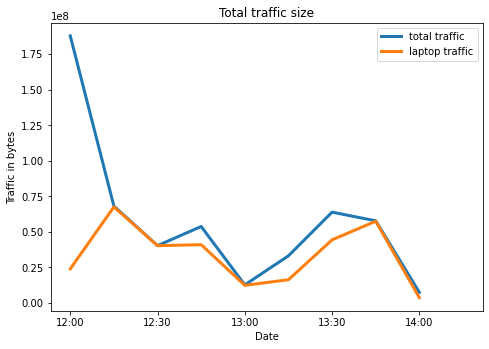

<Figure size 432x288 with 0 Axes>

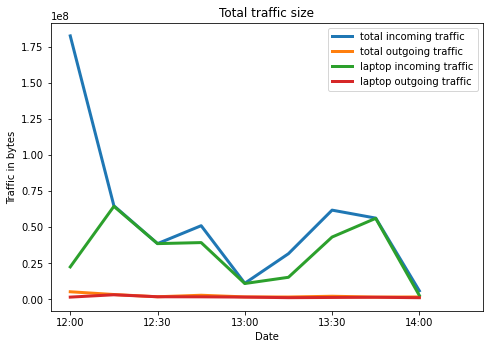

<Figure size 432x288 with 0 Axes>

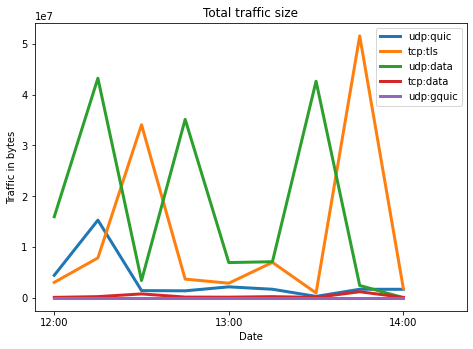

<Figure size 432x288 with 0 Axes>

In [28]:
## Stanley's BBB calls

# Start and End date of graph
startdate_str =  "2022-01-13T12:00:00+01:00"
enddate_str =    "2022-01-13T14:15:00+01:00"

# Used db
db_used = db_stanley
gen_activitygraph(startdate_str, enddate_str, db_used,
                  startshade_str="", endshade_str="",
                  tickn=2, savefile="bbbcall_stanley.png", showtotal=True, skipdevices=["handy"])

gen_ioactivitygraph(startdate_str, enddate_str, db_used,
                  startshade_str="", endshade_str="", shadecolor=shadecolor,
                  tickn=2, savefile="io_bbbcall_stanley.png", showtotal=True, skipdevices=["handy"])

gen_protograph(startdate_str, enddate_str,
                   extract_top_proto(db_used, 5, startdate_str, enddate_str), db_used,
                   startshade_str="", endshade_str="", shadecolor="w",
                   tickn = 4, savefile="proto_bbbcall_stanley.png", skipdevices=["handy"])

Total size 0.8006990709999999 GB


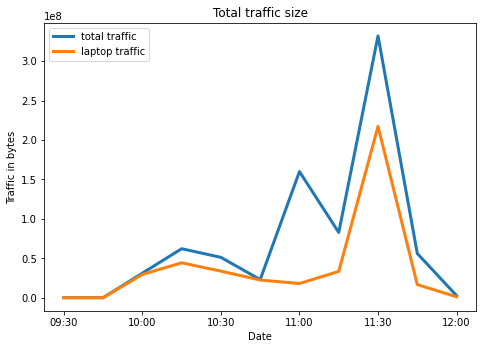

<Figure size 432x288 with 0 Axes>

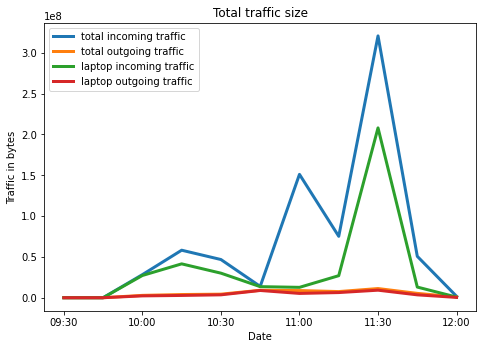

<Figure size 432x288 with 0 Axes>

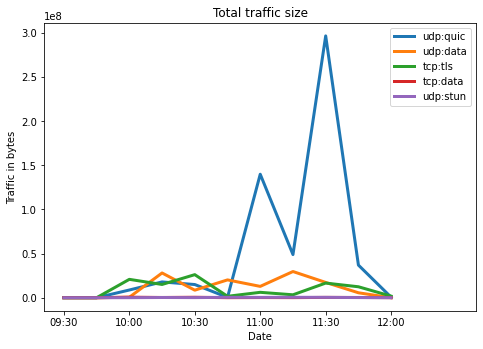

<Figure size 432x288 with 0 Axes>

In [29]:
## Stanley's BBB calls with emotion recognition

# Start and End date of graph
startdate_str =  "2022-01-14T09:30:00+01:00"
enddate_str =    "2022-01-14T12:30:00+01:00"

# Start and End time of shaded area
startshade_str = "2022-01-14T10:00:00+01:00"
endshade_str =   "2022-01-14T12:00:00+01:00"
shadecolor = "w"

# Used db
db_used = db_stanley
gen_activitygraph(startdate_str, enddate_str, db_used,
                  startshade_str=startshade_str, endshade_str=endshade_str, shadecolor=shadecolor,
                  tickn=2, savefile="bbbcall_emote_stanley.png", showtotal=True, skipdevices=["handy"])

gen_ioactivitygraph(startdate_str, enddate_str, db_used,
                  startshade_str=startshade_str, endshade_str=endshade_str, shadecolor=shadecolor,
                  tickn=2, savefile="io_bbbcall_emote_stanley.png", showtotal=True, skipdevices=["handy"])

gen_protograph(startdate_str, enddate_str,
                   extract_top_proto(db_used, 5, startdate_str, enddate_str), db_used,
                   startshade_str="", endshade_str="", shadecolor="w",
                   tickn = 2, savefile="proto_bbbcall_emote_stanley.png", skipdevices=[])

Total size 0.350946604 GB


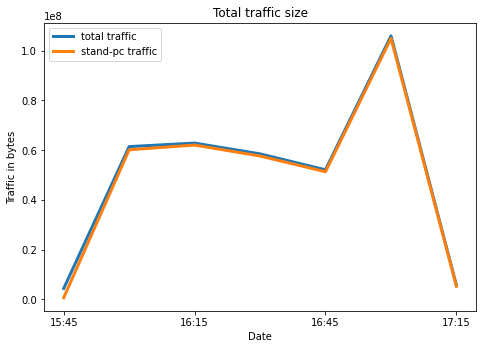

<Figure size 432x288 with 0 Axes>

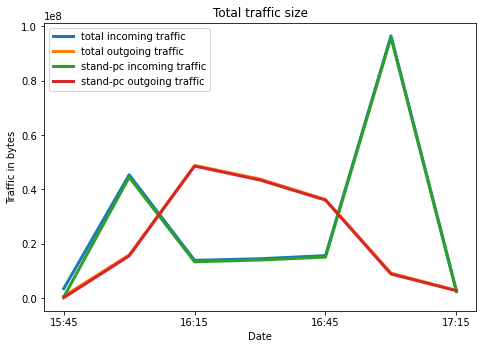

<Figure size 432x288 with 0 Axes>

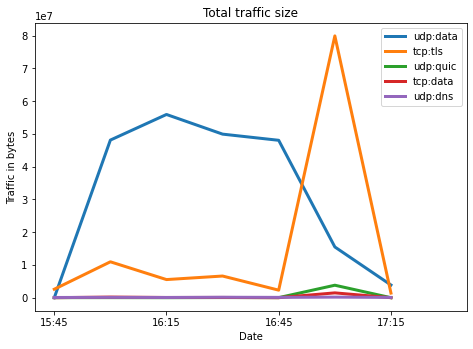

<Figure size 432x288 with 0 Axes>

In [30]:
## Raka's Zoom session

# Start and End date of graph
startdate_str =  "2022-01-12T16:45:00+01:00"
enddate_str =    "2022-01-12T18:30:00+01:00"

# Start and End time of shaded area
startshade_str = "2022-01-12T17:15:00+01:00"
endshade_str =   "2022-01-12T18:15:00+01:00"
shadecolor = "w"

# Used db
db_used = db_raka
gen_activitygraph(startdate_str, enddate_str, db_used,
                  startshade_str=startshade_str, endshade_str=endshade_str, shadecolor=shadecolor,
                  tickn=2, savefile="zoomcall_raka.png", showtotal=True,skipdevices=["laptop", "handy"])
gen_ioactivitygraph(startdate_str, enddate_str, db_used,
                  startshade_str=startshade_str, endshade_str=endshade_str, shadecolor=shadecolor,
                  tickn=2, savefile="io_zoomcall_raka.png", showtotal=True,skipdevices=["laptop", "handy"])
gen_protograph(startdate_str, enddate_str,
                   extract_top_proto(db_used, 5, startdate_str, enddate_str), db_used,
                   startshade_str="", endshade_str="", shadecolor="w",
                   tickn = 2, savefile="proto_zoomcall_raka.png", skipdevices=["handy"])

Total size 0.409132189 GB


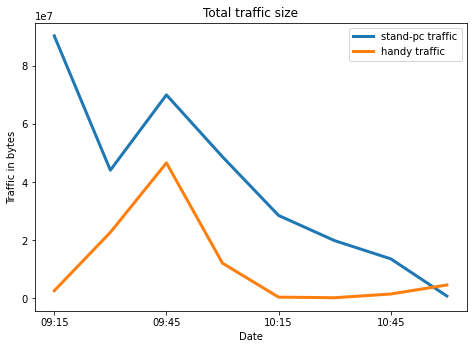

<Figure size 432x288 with 0 Axes>

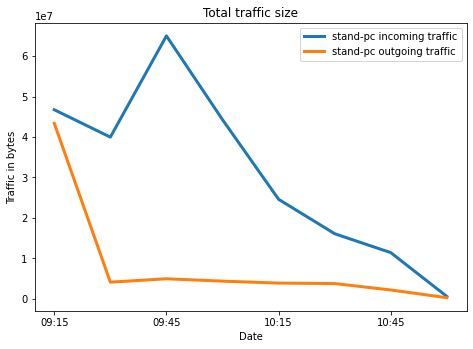

<Figure size 432x288 with 0 Axes>

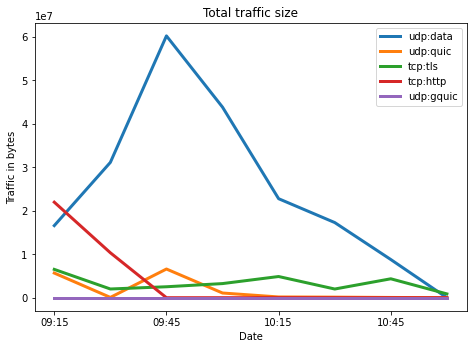

<Figure size 432x288 with 0 Axes>

In [31]:
## Raka's BBB+Prokastination session

# Start and End date of graph
startdate_str =  "2022-01-12T10:15:00+01:00"
enddate_str =    "2022-01-12T12:00:02+01:00"

# Start and End time of shaded area
startshade_str = "2022-01-12T10:00:00+01:00"
endshade_str =   "2022-01-12T12:00:00+01:00"
shadecolor = "y"

# Used db
db_used = db_raka
gen_activitygraph(startdate_str, enddate_str, db_used,
                  startshade_str=startdate_str, endshade_str=enddate_str, shadecolor="w",
                  tickn=2, savefile="bbbcall_raka.png", showtotal=False,skipdevices=["laptop"])
gen_ioactivitygraph(startdate_str, enddate_str, db_used,
                  startshade_str=startdate_str, endshade_str=enddate_str, shadecolor="w",
                  tickn=2, savefile="io_bbbcall_raka.png", showtotal=False,skipdevices=["laptop", "handy"])
gen_protograph(startdate_str, enddate_str,
                   extract_top_proto(db_used, 5, startdate_str, enddate_str), db_used,
                   startshade_str="", endshade_str="", shadecolor="w",
                   tickn = 2, savefile="proto_bbbcall_raka.png", skipdevices=["handy"])

Total size 4.668678551999999 GB


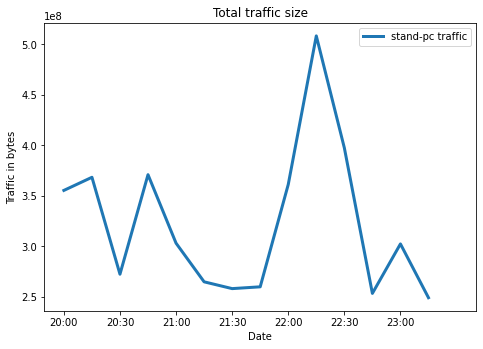

<Figure size 432x288 with 0 Axes>

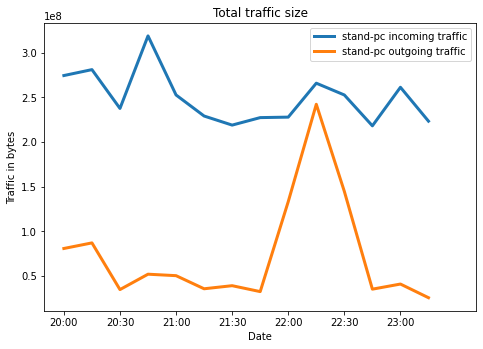

<Figure size 432x288 with 0 Axes>

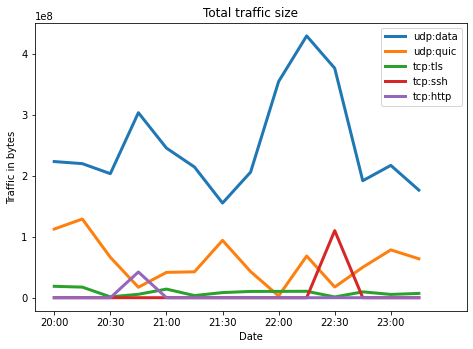

<Figure size 432x288 with 0 Axes>

In [32]:
## Raka's Discord session

# Start and End date of graph
startdate_str =  "2022-01-12T21:00:00+01:00"
enddate_str =    "2022-01-13T00:30:02+01:00"

# Start and End time of shaded area
startshade_str = "2022-01-12T10:00:00+01:00"
endshade_str =   "2022-01-13T12:00:00+01:00"
shadecolor = "y"

# Used db
db_used = db_raka
gen_activitygraph(startdate_str, enddate_str, db_used,
                  startshade_str=startdate_str, endshade_str=enddate_str, shadecolor="w",
                  tickn=2, savefile="discordcall_raka.png", showtotal=False,skipdevices=["laptop", "handy"])
gen_ioactivitygraph(startdate_str, enddate_str, db_used,
                  startshade_str=startdate_str, endshade_str=enddate_str, shadecolor="w",
                  tickn=2, savefile="io_discordcall_raka.png", showtotal=False,skipdevices=["laptop", "handy"])
gen_protograph(startdate_str, enddate_str,
                   extract_top_proto(db_used, 5, startdate_str, enddate_str), db_used,
                   startshade_str="", endshade_str="", shadecolor="w",
                   tickn = 2, savefile="proto_discordcall_raka.png", skipdevices=[])